#**Import**

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from math import pi

def dft_shift(X):
    N = len(X)
    if (N % 2 == 0):
        # even-length: return N+1 values
        print("even-length")
        return np.arange(-int(N/2), int(N/2) + 1), np.concatenate((X[int(N/2):], X[:int(N/2)+1]))
    else:
        # odd-length: return N values
        print("odd-length")
        return np.arange(-int((N-1)/2), int((N-1)/2) + 1), np.concatenate((X[int((N+1)/2):], X[:int((N+1)/2)]))

#**Fourier Transforms**

##**Fourier Transforms - Definition**

* Fourier series is a periodic function composed of harmonically related sinusoids, combined by a weighted summation.

* With appropriate weights, one cycle (or period) of the summation can be made to approximate an arbitrary function in that interval (or the entire function if it too is periodic). As such, the summation is a synthesis of another function. 

* The discrete-time Fourier transform is an example of Fourier series. The process of deriving weights that describe a given function is a form of Fourier analysis. For functions on unbounded intervals, the analysis and synthesis analogies are Fourier transform and inverse transform.

* The Fourier transform is an extension of the Fourier series that results when the period of the represented function is lengthened and allowed to approach infinity.

##**Fourier Transforms - Motivation**

Description of the evolution of a physical phenomenon (temperature, pressure ect.)

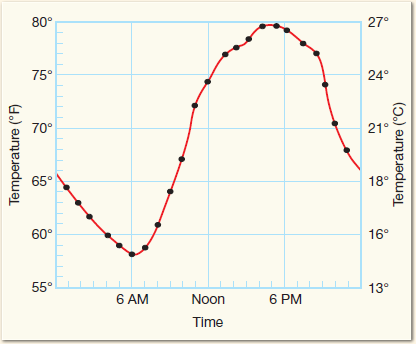

1.   Analysis - understanding the information carried in the signal
2.   Synthesis - creating a signal to contain the given information




Analysis:
*   from time domain to frequncy domain
*   find the contribution of different frequncies
*   discover "hidden" signal properties

Synthesis:
*   from frequncy domain to time domain
*   create signal with known frequncy content
*   fit signal to specific frequncy region









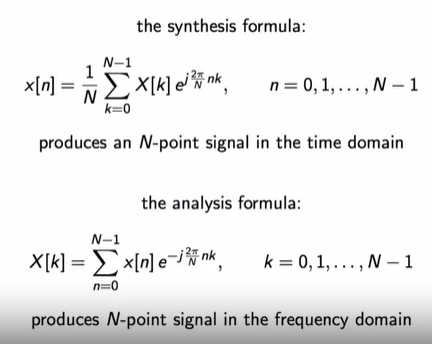

##**Fourier Transforms - Synthesis**

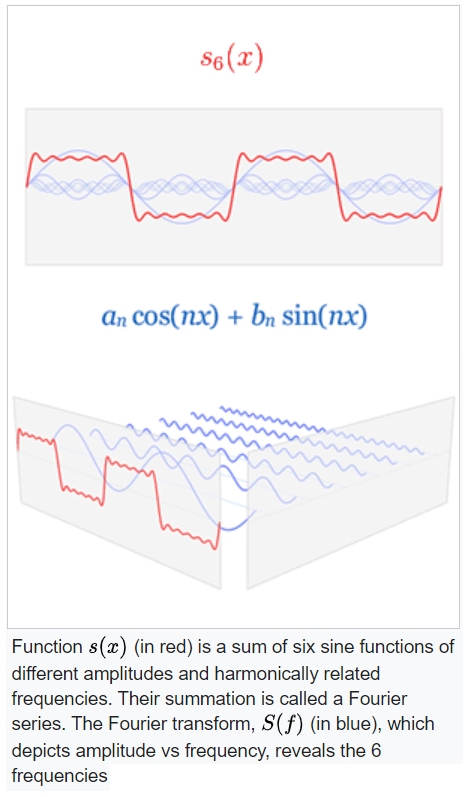

##**Fourier Transforms - Analysis**

**Discrete Time Fourier Transform**

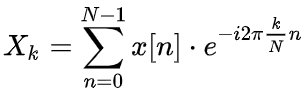

**Analytical solution**

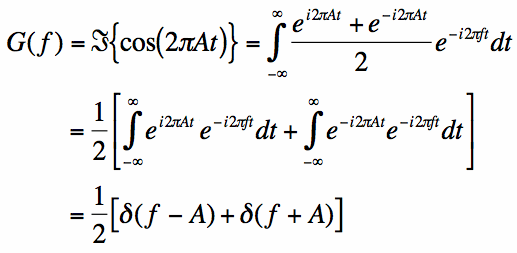

Text(0.5, 0, 'n')

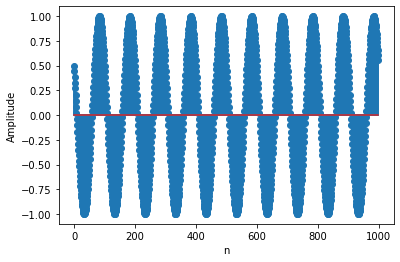

In [ ]:
n = np.arange(0,1000)
freq = 10
N=len(n)

x = np.cos((2*pi/N)*freq*n+(pi/3))
#x = np.cos(-(2*pi/N)*freq*n-(pi/3))

plt.stem(x)
plt.ylabel('Amplitude')
plt.xlabel('n')

In [ ]:
# fft
X = np.fft.fft(x);

## Positive and negative frequencies

The coefficient number $k$ indicates the contribution (in amplitude and phase) of a sinusoidal component of frequency

$$
    \omega_k = \frac{2\pi}{N}k
$$

Because of the rotational symmetry of complex exponentials, a positive frequency $\omega$ between $\pi$ and $2\pi$ is equivalent to a negative frequency of $\omega - 2\pi$; this means that half of the DFT coefficients correspond to negative frequencies and when we concentrate on the physical properties  of the DFT it would probably make more sense to plot the coefficients centered around zero with positive frequencies on the right and negative frequencies on the left.

The reason why this is not usuall done are many, including
 
 * convenience
 * since we are manipulating finite-length signals, the convention dictates that we start at index zero 
 * when dealing with real-valued data, the DFT is symmetric in magnitude, so the first half of the coefficients is enough
 * if we're looking for maxima in the magnitude, it's just easier to start at zero.

There is also another subtle point that we must take into account when shifting a DFT vector: **we need to differentiate between odd and even length signals**. With $k=0$ as the center point, odd-length vectors will produce symmetric data sets with $(N-1)/2$ points left and right of the oring, whereas even-length vectors will be asymmetric, with one more point on the positive axis; indeed, the highest positive frequency for even-length signals will be equal to $\omega_{N/2} = \pi$. Since the frequencies of $\pi$ and $-\pi$ are identical, we can copy the top frequency data point to the negative axis and obtain a symmetric vector also for even-length signals. 

Here is a function that does that:

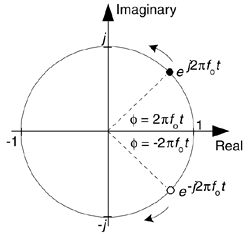

In [ ]:
# calc magnitude
magnitude = np.sqrt(X * np.conj(X))
magnitude = magnitude/len(x)

# calc imagenary part
imag_part = np.imag(X).copy()
mask_low_val = np.abs(imag_part) < 0.001
imag_part[mask_low_val] = 0
phase = np.arctan(imag_part/np.real(X))

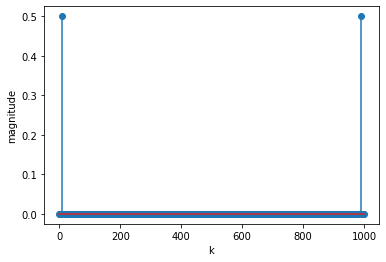

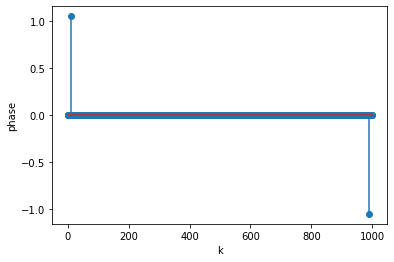

In [ ]:
# plot magnitude
plt.stem(magnitude);
#plt.xlim([980,1000])
plt.ylabel('magnitude')
plt.xlabel('k')
plt.show()

# plot phase
plt.stem(phase);
plt.ylabel('phase')
plt.xlabel('k')
plt.show()

In [ ]:
# magnitude shift
n_magnitude, y_magnitude = dft_shift(magnitude)

# phase shift
n_phase, y_phase = dft_shift(phase)

even-length
even-length


## **Real and Imaginary part**



*   **Real part** of the fourier transform represent the amplitude of the signal in the frequncy
*   **Imaginary part** of the fourier transform represent the phase of the signal in the frequncy


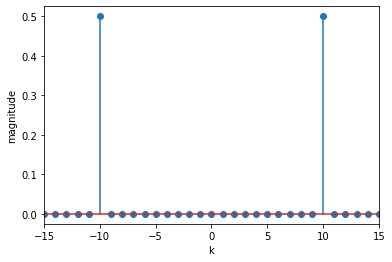

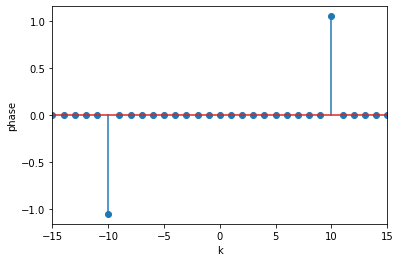

In [ ]:
plt.stem(n_magnitude, y_magnitude);
plt.xlim([-freq-5,freq+5])
#plt.xlim([0,freq+5])
plt.ylabel('magnitude')
plt.xlabel('k')
plt.show()

plt.stem(n_phase, y_phase);
plt.xlim([-freq-5,freq+5])
plt.ylabel('phase')
plt.xlabel('k')
plt.show()

##**Emergy and Power**



*   Energy E(s) of a continuous-time signal x(t) is defined as the area under the squared magnitude of the considered signal
*   Power is the amount of energy transferred or converted per unit time
*   Unit of E(s) will be (unit of signal)2.
* Energy in this context is not, strictly speaking, the same as the conventional notion of energy in physics and the other sciences.
* The two concepts are, however, closely related, and it is possible to convert from one to the other E = E(s)/Z


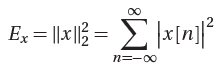

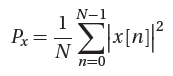

In [ ]:
# calc energy 
#energy = X * np.conj(X)
energy = magnitude**2

# calc power
power = energy/len(energy)

even-length


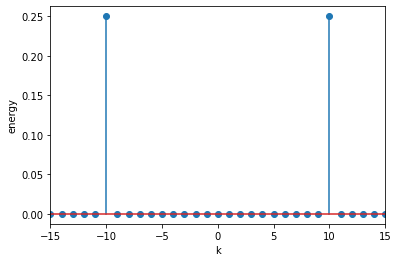

even-length


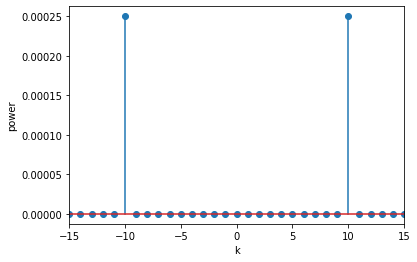

In [ ]:
# plot energy
n_energy, y_energy = dft_shift(energy)
plt.stem(n_energy, y_energy);
plt.xlim([-freq-5,freq+5])
plt.ylabel('energy')
plt.xlabel('k')
plt.show()

# plot power
n_power, y_power = dft_shift(power)
plt.stem(n_power, y_power);
plt.xlim([-freq-5,freq+5])
plt.ylabel('power')
plt.xlabel('k')
plt.show()

##**Analysis Example**

In [ ]:
n = np.arange(0,10000)
freq = 2
N=len(n)/freq

s1 = 3*np.cos((2*pi/N)*10*n+(pi/3))
s2 = 0.5*np.cos((2*pi/N)*25*n+(pi/5))
s3 = 5*np.cos((2*pi/N)*50*n)
s4 = np.cos((2*pi/N)*100*n)

x_signal = s1 + s2 + s3 + s4

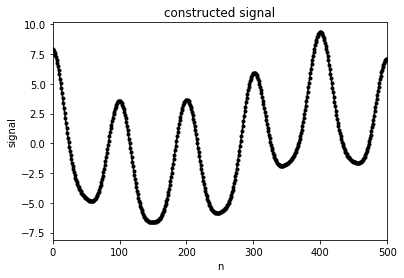

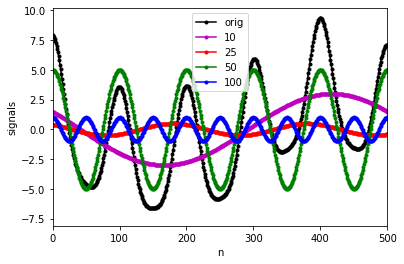

In [ ]:
# plot constructed signal
plt.plot(x_signal,'.-k')
plt.xlim([0,500])
plt.title("constructed signal")
plt.ylabel('signal')
plt.xlabel('n')
plt.show()

# plot constructed signal with "components"
plt.plot(x_signal,'.-k')
plt.plot(s1,'.-m')
plt.plot(s2,'.-r')
plt.plot(s3,'.-g')
plt.plot(s4,'.-b')
plt.xlim([0,500])
plt.title("")
plt.ylabel('signals')
plt.xlabel('n')
plt.legend(['orig','10','25','50','100'])
plt.show()

In [ ]:
# calc fft, magnitude and phase
X = np.fft.fft(x_signal)
magnitude = np.sqrt(X * np.conj(X))
magnitude = magnitude/len(x)

# calc imagenary part
imag_part = np.imag(X).copy()
mask_low_val = np.abs(imag_part) < 0.001
imag_part[mask_low_val] = 0

phase = np.arctan(imag_part/np.real(X))

n_magnitude, y_magnitude = dft_shift(magnitude)
n_phase, y_phase = dft_shift(phase)

energy = X * np.conj(X)
power = energy/len(y)

even-length
even-length


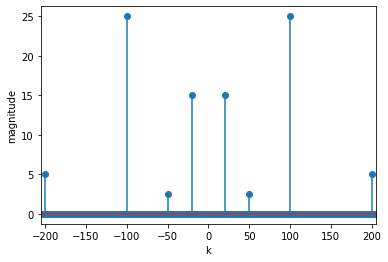

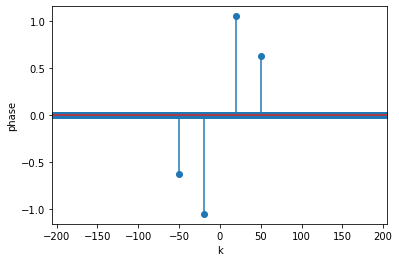

even-length


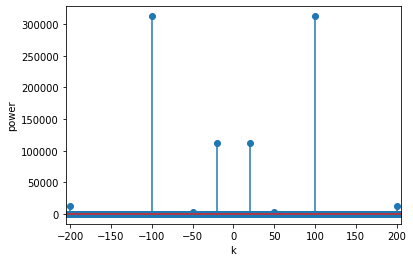

In [ ]:
# plot magnitude
plt.stem(n_magnitude, y_magnitude)
plt.xlim([-freq*100-5,freq*100+5])
plt.ylabel('magnitude')
plt.xlabel('k')
plt.show()

# plot phase
plt.stem(n_phase, y_phase)
plt.xlim([-freq*100-5,freq*100+5])
plt.ylabel('phase')
plt.xlabel('k')
plt.show()

# plot power
n, y = dft_shift(power)
plt.stem(n, y);
plt.xlim([-freq*100-5,freq*100+5])
plt.ylabel('power')
plt.xlabel('k')
plt.show()

##**Discreate cosine transform**



*   A discrete cosine transform (DCT) expresses a finite sequence of data points in terms of a sum of cosine functions oscillating at different frequencies

*   DCTs are also important to numerous other applications in science and engineering, such as digital signal processing, telecommunication devices, reducing network bandwidth usage, and spectral methods for the numerical solution of partial differential equations.

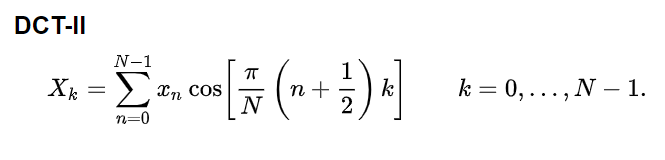

 

*   DCT-|| transform is exactly equivalent (up to an overall scale factor of 2) to a DFT of 4N real inputs of even symmetry where the even-indexed elements are zero
*   cos(2*pi*n*k/4N) ~ cos((pi/N)*(n+0.5)*k)



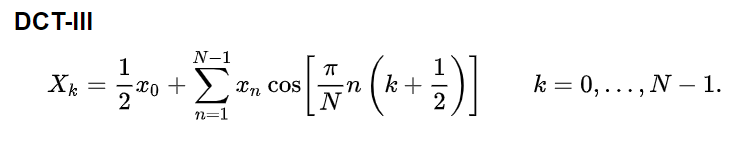



*   Because it is the inverse of DCT-II (up to a scale factor, see below), this form is sometimes simply referred to as "the inverse DCT" ("IDCT")



##**DFT vs DCT**

**DFT with length 4N**

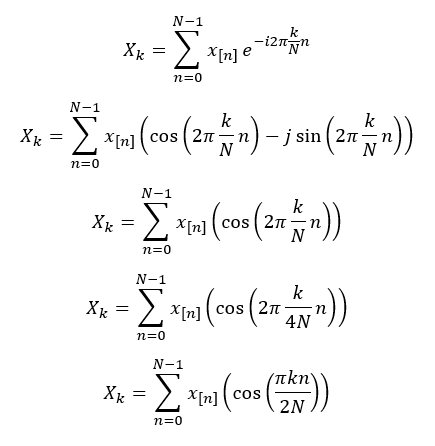

**DCT**

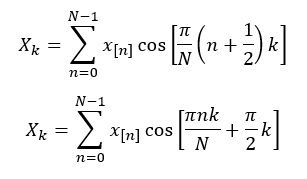

**DFT vs DCT**

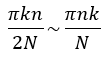

#**DCT implementation**

Text(0.5, 0, 'n')

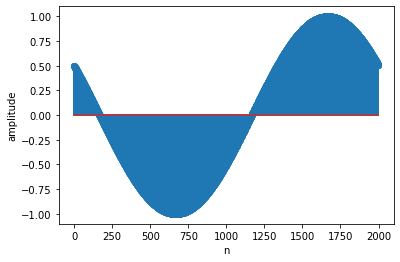

In [ ]:
n = np.arange(0,2000)
N=len(n)/1

x = np.cos(((2*pi/N))*n+(pi/3))
plt.stem(x)
plt.ylabel('amplitude')
plt.xlabel('n')

In [ ]:
def calc_single_dct_type_2(x, k):
    N = len(x)
    
    # DCT-II
    n = np.arange(0,N-1)
    xk = np.sum(x[0:N-1]*np.cos((pi/N)*(n+0.5)*k))

    return xk

def  calc_single_idct(x, k):
    N = len(x)

    # DCT-III
    n = np.arange(1,N-1)
    xk = 0.5 * x[0] + np.sum(x[1:N-1] * np.cos((pi/N) * n * (k + 0.5)))

    return xk

In [ ]:
# DCT-II
xk=list()
for k in range(0,len(x)-1):
    xk.append(calc_single_dct_type_2(x, k))
xk=np.array(xk)

In [ ]:
# DCT-III
ixk=list()
for k in range(0,len(x)-1):
    ixk.append(calc_single_idct(xk, k))
ixk=np.array(ixk)

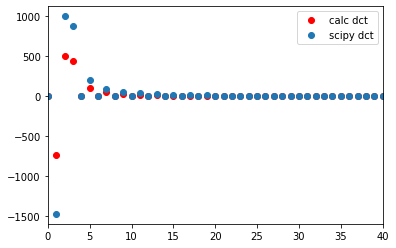

In [ ]:
# plot calculated dct
from scipy.fft import fft, dct
plt.plot(xk,'or')
plt.plot(dct(x),'o')
plt.xlim([0, 40])
plt.legend(['calc dct', 'scipy dct'])

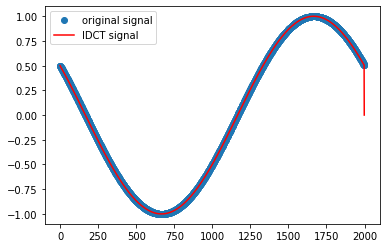

In [ ]:
# plot idct
plt.plot(x,'o')
plt.plot(ixk/np.max(np.abs((ixk))), '-r')
plt.legend(['original signal', 'IDCT signal'])

In [ ]:
# calc magnitude
magnitude = np.sqrt(xk * np.conj(xk))
magnitude = magnitude/len(xk)

# calc imagenary part
imag_part = np.imag(xk).copy()
#mask_low_val = np.abs(imag_part) < 0.001
#imag_part[mask_low_val] = 0

# magnitude shift
n_magnitude, y_magnitude = dft_shift(magnitude)

# plot phase
phase = np.arctan(imag_part/np.real(xk))

# phase shift
n_phase, y_phase = dft_shift(phase)

odd-length
odd-length


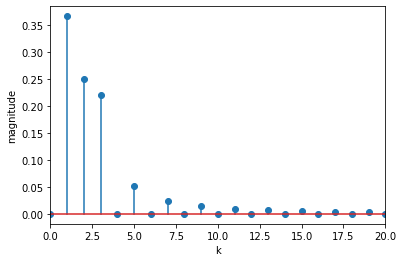

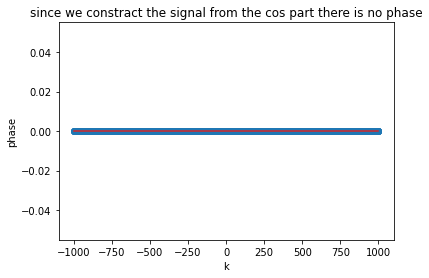

In [ ]:
# plot magnitude
plt.stem(n_magnitude, y_magnitude);
plt.xlim([0,20])
#plt.xlim([0,2.5])
plt.ylabel('magnitude')
plt.xlabel('k')
plt.show()

# plot phase
plt.stem(n_phase, y_phase);
#plt.xlim([-10,10])
plt.title('since we constract the signal from the cos part there is no phase')
plt.ylabel('phase')
plt.xlabel('k')
plt.show()